## LDA with Gensim

In [1]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import LdaModel

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
path = '/content/gdrive/My Drive/data/gensim'

In [9]:
pd.set_option('display.max_colwidth', -1)
train = pd.read_csv(path + "/ag_news_train.csv")
from gensim.parsing.preprocessing import preprocess_string
text_tokenized = []
for doc in train['Description']:
   k = preprocess_string(doc)
   text_tokenized.append(k)

<ipython-input-9-ad0f4bb62a5d>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [10]:
text_tokenized[0:3]

[['reuter',
  'short',
  'seller',
  'wall',
  'street',
  'dwindl',
  'band',
  'ultra',
  'cynic',
  'see',
  'green'],
 ['reuter',
  'privat',
  'invest',
  'firm',
  'carlyl',
  'group',
  'reput',
  'make',
  'time',
  'occasion',
  'controversi',
  'plai',
  'defens',
  'industri',
  'quietli',
  'place',
  'bet',
  'market'],
 ['reuter',
  'soar',
  'crude',
  'price',
  'plu',
  'worri',
  'economi',
  'outlook',
  'earn',
  'expect',
  'hang',
  'stock',
  'market',
  'week',
  'depth',
  'summer',
  'doldrum']]

In [11]:
from gensim.corpora import Dictionary
gensim_dictionary = Dictionary()
bow_corpus = [gensim_dictionary.doc2bow(doc, allow_update=True) for doc in text_tokenized]
id_words = [[(gensim_dictionary[id], count) for id, count in line] for line in bow_corpus]

In [12]:
from gensim.models import TfidfModel
tfidf = TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [13]:
from gensim.test.utils import datapath
dict_file = datapath(path + "/gensim_dictionary_AGnews")
gensim_dictionary.save(dict_file)

In [14]:
import pickle
file = open(path + "/BoW_AGnews_corpus.pkl", 'wb')
pickle.dump(bow_corpus, file)
file.close()

In [15]:
file = open(path + "/TFIDF_AGnews_corpus.pkl", 'wb')
pickle.dump(corpus_tfidf, file)
file.close()

In [16]:
from gensim import corpora
corpora.MmCorpus.serialize(path + "/BoW_AGnews_corpus.mm", bow_corpus)
corpora.MmCorpus.serialize(path + "/TFIDF_AGnews_corpus.mm", corpus_tfidf)

In [17]:
from gensim.models import LdaModel
lda_bow = LdaModel(bow_corpus,
num_topics=10,
id2word = gensim_dictionary)

In [18]:
import pprint as pp
pp.pprint(lda_bow.print_topics())

[(0,
  '0.058*"quot" + 0.010*"oracl" + 0.010*"new" + 0.009*"india" + 0.009*"dec" + '
  '0.008*"secur" + 0.008*"mail" + 0.008*"european" + 0.008*"phone" + '
  '0.006*"mobil"'),
 (1,
  '0.024*"game" + 0.021*"new" + 0.019*"season" + 0.015*"night" + 0.014*"leagu" '
  '+ 0.011*"coach" + 0.010*"year" + 0.009*"point" + 0.009*"team" + '
  '0.009*"red"'),
 (2,
  '0.012*"south" + 0.010*"state" + 0.009*"north" + 0.009*"year" + '
  '0.008*"nation" + 0.008*"test" + 0.008*"china" + 0.008*"dai" + 0.008*"peopl" '
  '+ 0.007*"said"'),
 (3,
  '0.013*"sport" + 0.012*"world" + 0.011*"final" + 0.010*"team" + 0.010*"year" '
  '+ 0.010*"second" + 0.009*"win" + 0.009*"game" + 0.008*"champion" + '
  '0.008*"cup"'),
 (4,
  '0.019*"presid" + 0.014*"said" + 0.012*"minist" + 0.011*"elect" + '
  '0.010*"leader" + 0.009*"state" + 0.009*"prime" + 0.008*"palestinian" + '
  '0.008*"govern" + 0.007*"plan"'),
 (5,
  '0.035*"reuter" + 0.025*"said" + 0.021*"fullquot" + 0.018*"kill" + '
  '0.014*"target" + 0.014*"http" + 0.

In [19]:
lda_tfidf = LdaModel(corpus_tfidf, num_topics=10,
id2word = gensim_dictionary)

In [20]:
import pprint as pp
pp.pprint(lda_tfidf.print_topics())

[(0,
  '0.008*"season" + 0.008*"coach" + 0.008*"game" + 0.007*"team" + '
  '0.007*"sport" + 0.007*"night" + 0.006*"leagu" + 0.006*"player" + '
  '0.006*"win" + 0.006*"second"'),
 (1,
  '0.020*"fullquot" + 0.012*"reuter" + 0.012*"http" + 0.011*"www" + '
  '0.011*"href" + 0.011*"ticker" + 0.011*"target" + 0.010*"aspx" + '
  '0.010*"quickinfo" + 0.010*"com"'),
 (2,
  '0.005*"presid" + 0.005*"state" + 0.004*"bush" + 0.004*"dec" + 0.004*"year" '
  '+ 0.004*"said" + 0.004*"elect" + 0.004*"footbal" + 0.004*"european" + '
  '0.004*"quot"'),
 (3,
  '0.007*"oracl" + 0.007*"airlin" + 0.006*"peoplesoft" + 0.005*"palestinian" + '
  '0.005*"bankruptci" + 0.004*"secur" + 0.004*"said" + 0.004*"amp" + '
  '0.004*"madrid" + 0.004*"browser"'),
 (4,
  '0.008*"decemb" + 0.007*"iraq" + 0.007*"minist" + 0.007*"said" + '
  '0.006*"iraqi" + 0.006*"govern" + 0.005*"prime" + 0.005*"presid" + '
  '0.005*"kill" + 0.005*"countri"'),
 (5,
  '0.010*"holidai" + 0.010*"score" + 0.009*"point" + 0.009*"arafat" + '
  '0.0

In [21]:
def build_lda_models(input_data, name, k):
    np.random.seed(42)
    # Train the model
    lda = LdaModel(input_data,
              num_topics=k,
              id2word = gensim_dictionary)
    # Save the model
    from gensim.test.utils import datapath
    tempfile = datapath( path + "/LDA_"
        + name + "_" + str(k))
    lda.save(tempfile)

In [22]:
import numpy as np
numTopicsList = np.arange(1,251,50)
for k in numTopicsList:
    build_lda_models(bow_corpus, "bow", k)

In [23]:
np.random.seed(42)
numTopicsList = np.arange(1,251,50)
for k in numTopicsList:
    build_lda_models(corpus_tfidf, "tfidf", k)

In [24]:
from gensim.models.coherencemodel import CoherenceModel
coherence_lda_bow = CoherenceModel(model=lda_bow,
        texts=text_tokenized,
        dictionary=gensim_dictionary,
        coherence='c_v')
coherence_lda = coherence_lda_bow.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.470631473869547


In [35]:
from gensim.models import LdaModel

In [36]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import datapath
np.random.seed(42)
def coherenceScore(corpus, name, k):
    # Load the model
    tempfile = datapath( path + "/LDA_"
 	    + name + "_" + str(k))
    lda = LdaModel.load(tempfile)

    # Compute the score
    coherence = CoherenceModel(model=lda,
                              texts=text_tokenized,
                              dictionary=gensim_dictionary,
                              coherence='u_mass')
    return coherence.get_coherence()

In [37]:
coherenceList = []
numTopicsList = np.arange(1,251,50)
for k in numTopicsList:
    c = coherenceScore(bow_corpus, "bow", k)
    coherenceList.append(c)

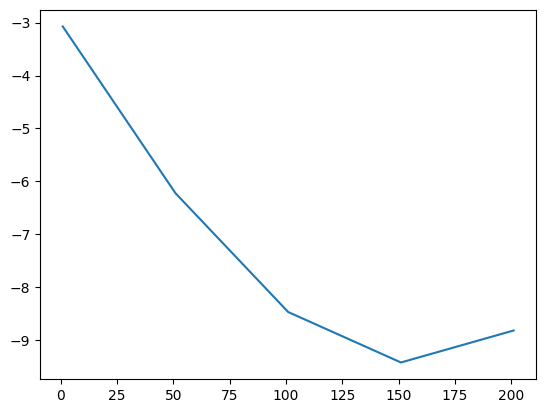

In [39]:
from matplotlib import pyplot as plt
plt.plot(numTopicsList, coherenceList)
plt.savefig(path + "/LDA_bow_coherence")
plt.show()

In [41]:
tempfile = datapath(path + "/LDA_bow_151")
lda = LdaModel.load(tempfile)

In [42]:
import pprint as pp
pp.pprint(lda_bow.print_topics()[0:5])

[(0,
  '0.058*"quot" + 0.010*"oracl" + 0.010*"new" + 0.009*"india" + 0.009*"dec" + '
  '0.008*"secur" + 0.008*"mail" + 0.008*"european" + 0.008*"phone" + '
  '0.006*"mobil"'),
 (1,
  '0.024*"game" + 0.021*"new" + 0.019*"season" + 0.015*"night" + 0.014*"leagu" '
  '+ 0.011*"coach" + 0.010*"year" + 0.009*"point" + 0.009*"team" + '
  '0.009*"red"'),
 (2,
  '0.012*"south" + 0.010*"state" + 0.009*"north" + 0.009*"year" + '
  '0.008*"nation" + 0.008*"test" + 0.008*"china" + 0.008*"dai" + 0.008*"peopl" '
  '+ 0.007*"said"'),
 (3,
  '0.013*"sport" + 0.012*"world" + 0.011*"final" + 0.010*"team" + 0.010*"year" '
  '+ 0.010*"second" + 0.009*"win" + 0.009*"game" + 0.008*"champion" + '
  '0.008*"cup"'),
 (4,
  '0.019*"presid" + 0.014*"said" + 0.012*"minist" + 0.011*"elect" + '
  '0.010*"leader" + 0.009*"state" + 0.009*"prime" + 0.008*"palestinian" + '
  '0.008*"govern" + 0.007*"plan"')]


In [43]:
new_texts = [
'The new Windows operating system will be released',
'The system uses the most difficult technologies and techniques',
'The U.S. consumer prices dropped for the first time in ten months']

In [44]:
from gensim.parsing.preprocessing import preprocess_string
new_texts_tokenized = []
for doc in new_texts:
   k = preprocess_string(doc)
   new_texts_tokenized.append(k)

In [45]:
new_corpus = [model_dict.doc2bow(text) for text in new_texts_tokenized]

NameError: ignored

In [ ]:
new_texts_vector = lda_bow.get_document_topics(
    new_corpus,
    minimum_probability=0.05,
    per_word_topics=False)

In [ ]:
for doc in new_texts_vector:
  print(doc)

In [ ]:
for i in [48,65,100]:
    print("Topic", i,"is:", lda_bow.print_topic(i))

In [ ]:
for i in [22,85]:
  print("Topic", i,"is:", lda_bow.print_topic(i))